In [ ]:
import numpy as np
import pandas as pd

In [327]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
csv('/content/titanic_data.csv')

In [216]:
X = df.drop(columns = ['Name','Survived','Ticket'],axis=1)

In [217]:
y = df['Survived']

In [218]:
X.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.25,NaN,S


In [219]:
X.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [220]:
cat_cols = X.select_dtypes(include='object').columns
cat_cols = cat_cols
cat_cols

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [221]:
num_cols = X.select_dtypes(include='number').columns
num_cols

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [232]:
imputer = SimpleImputer(strategy='most_frequent')
imputed = imputer.fit_transform(X)

In [235]:
pd.DataFrame(imputed).isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


In [246]:
transformer = ColumnTransformer(
    transformers=[
        # Categorical: Imputation + One-Hot Encoding
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), cat_cols),

        # Numerical: Imputation + Scaling
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # or 'median'
            ('scaler', StandardScaler())
        ]), num_cols),
    ],
    remainder='drop'  # Drop columns not explicitly transformed
)


In [247]:
X_transformed = pd.DataFrame(transformer.fit_transform(X))

In [248]:
X_transformed.columns = transformer.get_feature_names_out()

In [249]:
X_transformed.columns

Index(['cat__Sex_female', 'cat__Sex_male', 'cat__Cabin_A10', 'cat__Cabin_A14',
       'cat__Cabin_A16', 'cat__Cabin_A19', 'cat__Cabin_A20', 'cat__Cabin_A23',
       'cat__Cabin_A24', 'cat__Cabin_A26',
       ...
       'cat__Cabin_T', 'cat__Embarked_C', 'cat__Embarked_Q', 'cat__Embarked_S',
       'num__PassengerId', 'num__Pclass', 'num__Age', 'num__SibSp',
       'num__Parch', 'num__Fare'],
      dtype='object', length=158)

In [250]:
X_transformed

,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,cat__Cabin_A23,cat__Cabin_A24,cat__Cabin_A26,...,cat__Cabin_T,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,num__PassengerId,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [294]:
svc = SVC()

In [297]:
parameters = {
    'kernel' : ['linear','rbf'],
    'C' : [1,5,10]
}

In [298]:
pipe = Pipeline(
    steps = [
        ('transformer',transformer),
        ('grid',GridSearchCV(svc,parameters))
    ]
)

In [299]:
pipe.fit(X,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Cabin', 'Embarked'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))])),
                ('grid',
                 GridSearchCV(estimator=SVC(),
                              param_grid={'C': [1, 5, 10],
                                          'kernel': ['linear', 'rbf']}))])

In [317]:
pipe.named_steps['grid'].best_params_

{'C': 1, 'kernel': 'rbf'}

In [324]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.2,random_state=42)

In [325]:
svc1 = SVC(kernel='rbf', C=1)
svc1.fit(X_train,y_train)
y_pred = svc1.predict(X_test)


In [330]:
accuracy_score(y_test,y_pred)

0.8156424581005587

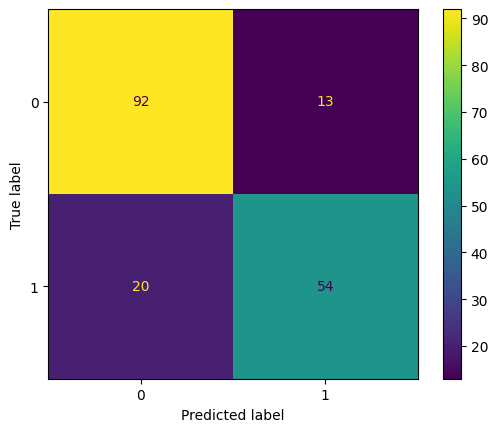

In [331]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()